Lật ảnh

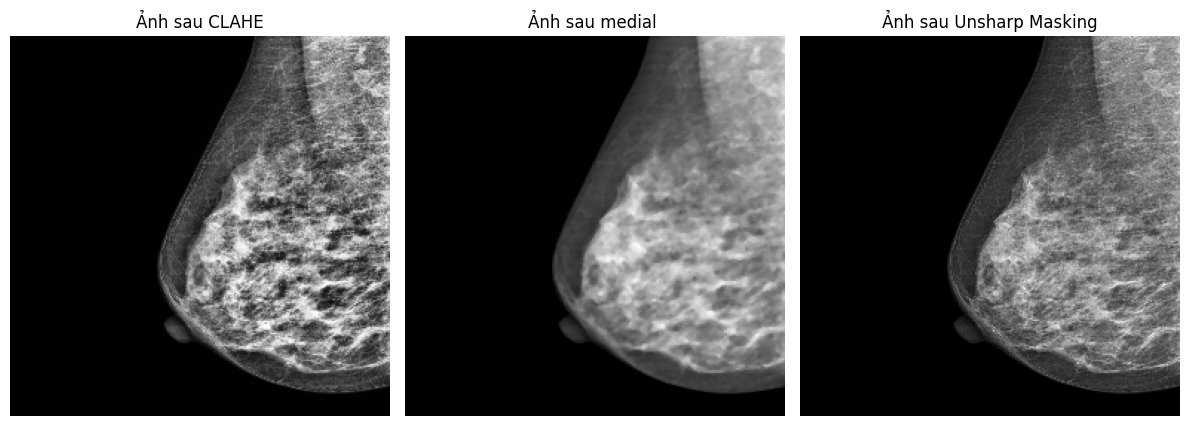

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh mammography
image_path = '/media/mountHDD2/chuyenmt/BrEaST/Mammo/experiment.png'  # Thay đổi đường dẫn tới ảnh của bạn
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Bước 1: Áp dụng CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Bước 2: Áp dụng Median Filter
median_filtered_image = cv2.medianBlur(image, 3)

# Bước 3: Áp dụng Unsharp Masking
# Tạo bộ lọc Gaussian
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Kết hợp ảnh để làm sắc nét
unsharp_masked_image = cv2.addWeighted(image, 1.5, gaussian_blur, -0.5, 0)

# Hiển thị các ảnh
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(clahe_image, cmap='gray')
plt.title('Ảnh sau CLAHE')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Ảnh sau medial ')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(unsharp_masked_image, cmap='gray')
plt.title('Ảnh sau Unsharp Masking')
plt.axis('off')

plt.tight_layout()
plt.show()


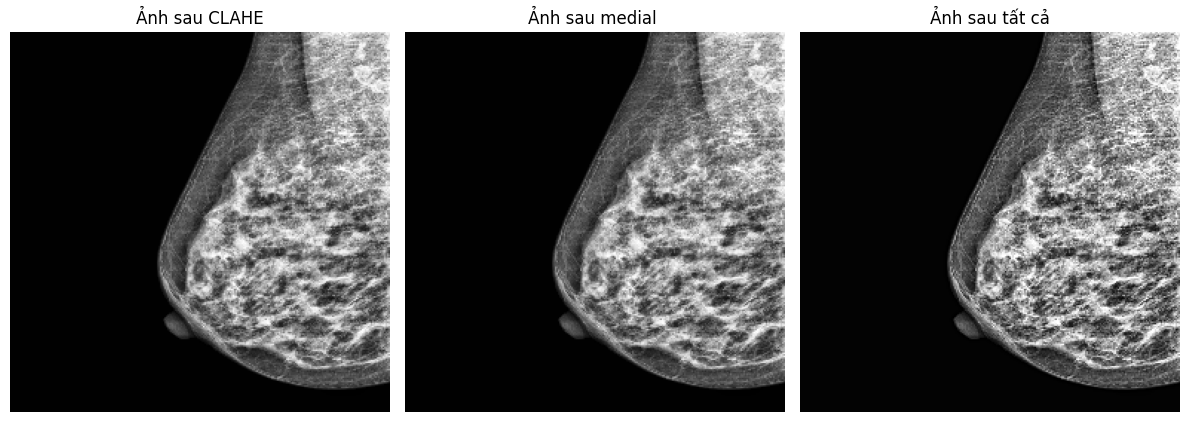

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh mammography
image_path = '/media/mountHDD2/chuyenmt/BrEaST/Mammo/experiment.png'  # Thay đổi đường dẫn tới ảnh của bạn
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Bước 1: Áp dụng CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
clahe_image = clahe.apply(image)

# Bước 2: Áp dụng Median Filter
median_filtered_image = cv2.medianBlur(clahe_image, 1)

# Bước 3: Áp dụng Unsharp Masking
# Tạo bộ lọc Gaussian
gaussian_blur = cv2.GaussianBlur(median_filtered_image, (5, 5), 0)

# Kết hợp ảnh để làm sắc nét
unsharp_masked_image = cv2.addWeighted(median_filtered_image, 1.5, gaussian_blur, -0.5, 0)

# Hiển thị các ảnh
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(clahe_image, cmap='gray')
plt.title('Ảnh sau CLAHE')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Ảnh sau medial ')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(unsharp_masked_image, cmap='gray')
plt.title('Ảnh sau tất cả')
plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
# Đường dẫn đến thư mục chứa ảnh
main = "/media/mountHDD2/chuyenmt/"
input_folder = main + 'Dataset/VinDr-Mammo/Processed/vindr_png_processing'
output_folder = main +'Dataset/VinDr-Mammo/Processed/vindr_png_processing_aligned'

# Tạo thư mục đầu ra nếu chưa tồn tại
os.makedirs(output_folder, exist_ok=True)

# Lặp qua tất cả các ảnh trong thư mục
for filename in  tqdm(os.listdir(input_folder)):
    if filename.endswith('.png'):  # Thay đổi nếu cần cho định dạng ảnh khác
        # Đọc ảnh
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path).convert('L')  # Chuyển đổi sang ảnh grayscale
        img_array = np.array(img)

        # Xác định kích thước của ảnh
        height, width = img_array.shape

        # Đếm số pixel khác 0 bên trái và bên phải
        left_pixels = np.sum(img_array[:, :width // 2] != 0)
        right_pixels = np.sum(img_array[:, width // 2:] != 0)

        # Nếu phần vú nằm bên trái, đảo ngược ảnh
        if left_pixels > right_pixels:
            img_array = np.fliplr(img_array)  # Đảo ngược ảnh

        # Lưu ảnh đã xử lý
        output_path = os.path.join(output_folder, filename)
        Image.fromarray(img_array).save(output_path)

print("Xử lý ảnh hoàn tất!")


100%|████████████████████████████████████████████████████████████████████████████| 20002/20002 [00:41<00:00, 482.02it/s]

Xử lý ảnh hoàn tất!


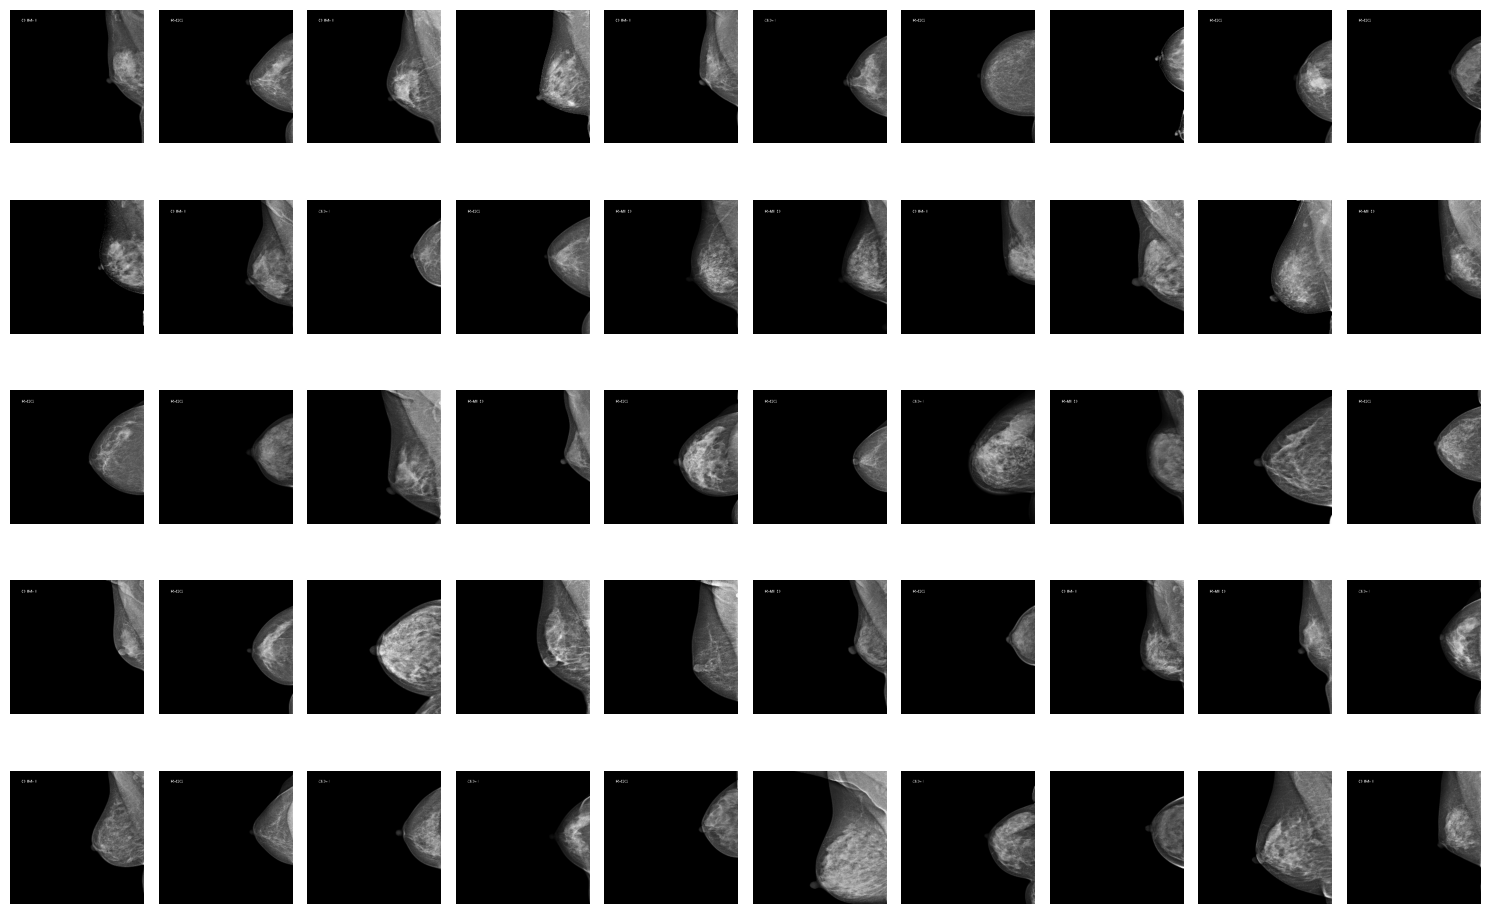

In [12]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục chứa ảnh đã xử lý
output_folder = main+'Dataset/VinDr-Mammo/Processed/vindr_png_processing_aligned'

# Lấy danh sách các tệp tin trong thư mục và giới hạn đến 50 tệp tin đầu tiên
file_list = [f for f in os.listdir(output_folder) if f.endswith('.png')][:50]

# Tạo một figure để hiển thị ảnh
plt.figure(figsize=(15, 10))

# Lặp qua 50 ảnh đầu tiên và hiển thị
for i, filename in enumerate(file_list):
    img_path = os.path.join(output_folder, filename)
    img = Image.open(img_path)
    
    # Tạo subplot cho mỗi ảnh
    plt.subplot(5, 10, i + 1)  # 5 hàng, 10 cột
    plt.imshow(img, cmap='gray')  # Hiển thị ảnh
    plt.axis('off')  # Tắt hiển thị trục
 # Thêm tiêu đề cho ảnh

plt.tight_layout()  # Căn chỉnh layout
plt.show()  # Hiển thị ảnh


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục chứa ảnh đã xử lý
output_folder = main + 'Dataset/VinDr-Mammo/Processed/vindr_png_processing_aligned'

# Lấy danh sách các tệp tin trong thư mục và giới hạn đến 50 tệp tin đầu tiên
file_list = [f for f in os.listdir(output_folder) if f.endswith('.png')][:50]

# Kích thước vùng cần xóa (có thể điều chỉnh tùy theo yêu cầu)
remove_area = (0, 0, 100, 50)  # (x1, y1, x2, y2)

# Tạo một figure để hiển thị ảnh
plt.figure(figsize=(15, 10))

# Lặp qua 50 ảnh đầu tiên và hiển thị
for i, filename in enumerate(file_list):
    img_path = os.path.join(output_folder, filename)
    img = Image.open(img_path).convert('L')  # Chuyển đổi sang ảnh grayscale
    img_array = np.array(img)

    # Xóa chữ chú thích bằng cách gán giá trị 0 cho vùng cần xóa
    img_array[remove_area[1]:remove_area[3], remove_area[0]:remove_area[2]] = 0

    # Lưu ảnh đã xử lý
    Image.fromarray(img_array).save(img_path)

    # Tạo subplot cho mỗi ảnh
    plt.subplot(5, 10, i + 1)  # 5 hàng, 10 cột
    plt.imshow(img_array, cmap='gray')  # Hiển thị ảnh
    plt.axis('off')  # Tắt hiển thị trục
    plt.title(filename)  # Thêm tiêu đề cho ảnh

plt.tight_layout()  # Căn chỉnh layout
plt.show()  # Hiển thị ảnh

output_path = os.path.join('Dataset/VinDr-Mammo/Processed/vindr_png_processing_aligned_remove_word', filename)
Image.fromarray(img_array).save(output_path)


In [2]:
import cv2
import numpy as np
main = "/media/mountHDD2/chuyenmt/"
input_folder = main + 'Dataset/VinDr-Mammo/Processed/vindr_png_processing'
output_folder = main +'Dataset/VinDr-Mammo/Processed/vindr_png_processing_aligned'
# read image
img = cv2.imread(output_folder + "/d7425e33a653e97f91b7b28cd0d20b47.png")                                               
hh, ww = img.shape[:2]

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# shave 40 pixels all around
gray = gray[40:hh-40, 40:ww-40]

# add 40 pixel black border all around
gray = cv2.copyMakeBorder(gray, 40,40,40,40, cv2.BORDER_CONSTANT, value=0)
 

In [4]:
img.shape

(256, 256, 3)

In [2]:

# apply otsu thresholding
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1] 

# apply morphology close to remove small regions
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (31,31))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# apply morphology open to separate breast from other regions
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (31,31))
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

# get largest contour
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)
 

In [ ]:

# draw largest contour as white filled on black background as mask
mask = np.zeros((hh,ww), dtype=np.uint8)
cv2.drawContours(mask, [big_contour], 0, 255, cv2.FILLED)

# dilate mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (305,305))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)

 

# show resultls
cv2.imshow('thresh', thresh)
cv2.imshow('morph', morph)
cv2.imshow('mask', mask)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# read image
main = "/media/mountHDD2/chuyenmt/"
input_folder = main + 'Dataset/VinDr-Mammo/Processed/vindr_png_processing'
output_folder = main +'Dataset/VinDr-Mammo/Processed/vindr_png_processing_aligned'


img = cv2.imread(output_folder + "/d7425e33a653e97f91b7b28cd0d20b47.png") 

hh, ww = img.shape[:2]

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply otsu thresholding
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1] 

# apply morphology close to remove small regions
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# apply morphology open to separate breast from other regions
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

# get largest contour
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# draw largest contour as white filled on black background as mask
mask = np.zeros((hh,ww), dtype=np.uint8)
cv2.drawContours(mask, [big_contour], 0, 255, cv2.FILLED)

# dilate mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55,55))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)

# save results
cv2.imwrite('mammogram_thresh.jpg', thresh)
cv2.imwrite('mammogram_morph2.jpg', morph)
cv2.imwrite('mammogram_mask2.jpg', mask)
cv2.imwrite('mammogram_result2.jpg', result)

# show resultls
cv2.imshow('thresh', thresh)
cv2.imshow('morph', morph)
cv2.imshow('mask', mask)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
import os
import shutil
from tqdm import tqdm
# Đường dẫn đến thư mục chứa các subfolder
base_dir = '/media/mountHDD3/data_storage/biomedical_data/Dataset/images'

# Lặp qua tất cả các subfolder trong thư mục
for subfolder in tqdm(os.listdir(base_dir)):
    subfolder_path = os.path.join(base_dir, subfolder)
    
    # Kiểm tra xem nó có phải là thư mục không
    if os.path.isdir(subfolder_path):
        # Lặp qua tất cả các file trong subfolder
        for file_name in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file_name)
            # Di chuyển file vào thư mục images
            shutil.move(file_path, base_dir)

        # Xóa subfolder sau khi đã di chuyển tất cả các file
        os.rmdir(subfolder_path)

print("Di chuyển file và xóa subfolder hoàn tất.")


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 5771.28it/s]

Di chuyển file và xóa subfolder hoàn tất.


In [44]:
import glob
img = glob.glob(base_dir + '/*')
len(img)

20000

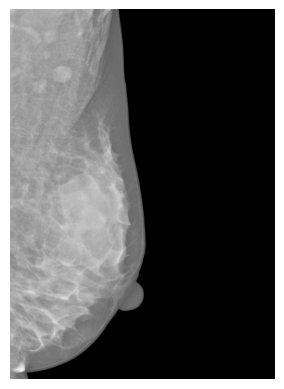

In [60]:
import pydicom
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Đường dẫn đến file DICOM
dicom_file = '/media/mountHDD3/data_storage/biomedical_data/Dataset/images/ffff43ffbe56fd959c81d83a5ecdc4dc.dicom'
output_png = '/media/mountHDD3/data_storage/biomedical_data/Dataset/images/output_image_bw.png'  # Đường dẫn để lưu ảnh PNG

# Đọc file DICOM
ds = pydicom.dcmread(dicom_file)

# Chuyển đổi dữ liệu pixel thành định dạng ảnh
image_data = ds.pixel_array

# # Nếu dữ liệu pixel là int16, chuẩn hóa và chuyển đổi thành uint8
# if image_data.dtype == np.int16:
#     # Chuẩn hóa dữ liệu
#     image_data = (image_data - image_data.min()) / (image_data.max() - image_data.min()) * 255
#     image_data = image_data.astype(np.uint8)
image_data = 255 - image_data
# Chuyển đổi dữ liệu thành ảnh
image = Image.fromarray(image_data)

# Lưu ảnh dưới định dạng PNG
# image.save(output_png)

# Hiển thị ảnh với nền trắng và đen
plt.imshow(image, cmap='gray')  # Sử dụng cmap='gray' cho nền trắng đen
plt.axis('off')  # Tắt trục
plt.show()

 


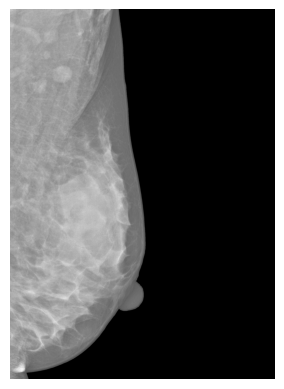

In [62]:
import pydicom
import matplotlib.pyplot as plt

def show_dicom_image(dicom_file):
    """ Display a DICOM file as a PNG image. """
    plan = pydicom.dcmread(dicom_file)
    image_2d = plan.pixel_array

    # Rescale to 0-255
    max_val = image_2d.max()
    image_2d = 255- image_2d
    image_2d_scaled = (image_2d / max_val * 255).astype(int)

    # Show the image
    plt.imshow(image_2d_scaled, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.show()

if __name__ == '__main__':
    dicom_file = '/media/mountHDD3/data_storage/biomedical_data/Dataset/images/ffff43ffbe56fd959c81d83a5ecdc4dc.dicom'
    show_dicom_image(dicom_file)


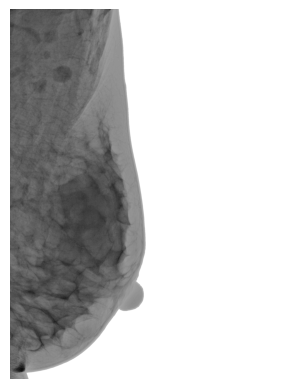

In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Path to the DICOM file
dicom_file_path = "/media/mountHDD3/data_storage/biomedical_data/Dataset/images/ffff43ffbe56fd959c81d83a5ecdc4dc.dicom"

# Load the DICOM image
dicom_image = pydicom.dcmread(dicom_file_path)

# Convert DICOM pixel data to a numpy array
image_array = dicom_image.pixel_array

# Ensure the image is in a format suitable for displaying (convert to uint8)
if image_array.dtype != np.uint8:
    image_array = (image_array / image_array.max() * 255).astype(np.uint8)

# Display the image using matplotlib
plt.imshow(image_array, cmap='gray')  # Use 'gray' for grayscale images
plt.axis('off')  # Hide axis
plt.show()
output_path = "/media/mountHDD2/chuyenmt/BrEaST/Mammo/convert_while_backgr.png"
plt.imsave(output_path, image_array, cmap='gray', vmin=0, vmax=255)

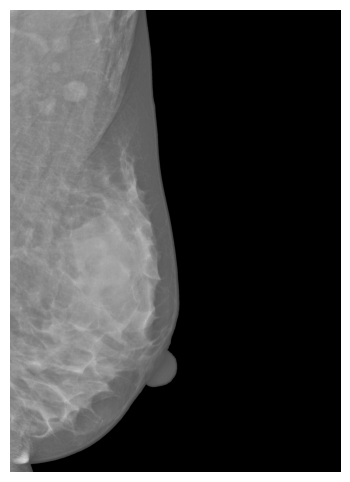

In [5]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới file DICOM
dicom_file_path = "/media/mountHDD3/data_storage/biomedical_data/Dataset/images/ffff43ffbe56fd959c81d83a5ecdc4dc.dicom"

# Đọc ảnh DICOM
dicom_image = pydicom.dcmread(dicom_file_path)

# Chuyển dữ liệu pixel của ảnh DICOM sang mảng numpy
image_array = dicom_image.pixel_array

# Đảm bảo chuyển đổi sang uint8 để hiển thị đúng
if image_array.dtype != np.uint8:
    image_array = (image_array / image_array.max() * 255).astype(np.uint8)

# Đảo màu: từ đen nền trắng sang trắng nền đen
image_array = 255 - image_array
plt.figure(figsize=(12, 6))
# Hiển thị ảnh với nền đen, nội dung trắng
plt.imshow(image_array, cmap='gray', vmin=0, vmax=255)  # Sử dụng cmap 'gray'
plt.axis('off')  # Ẩn trục
plt.show()

# # Lưu ảnh PNG từ DICOM
# output_path = "/media/mountHDD2/chuyenmt/BrEaST/Mammo/convert.png"
# plt.imsave(output_path, image_array, cmap='gray', vmin=0, vmax=255)


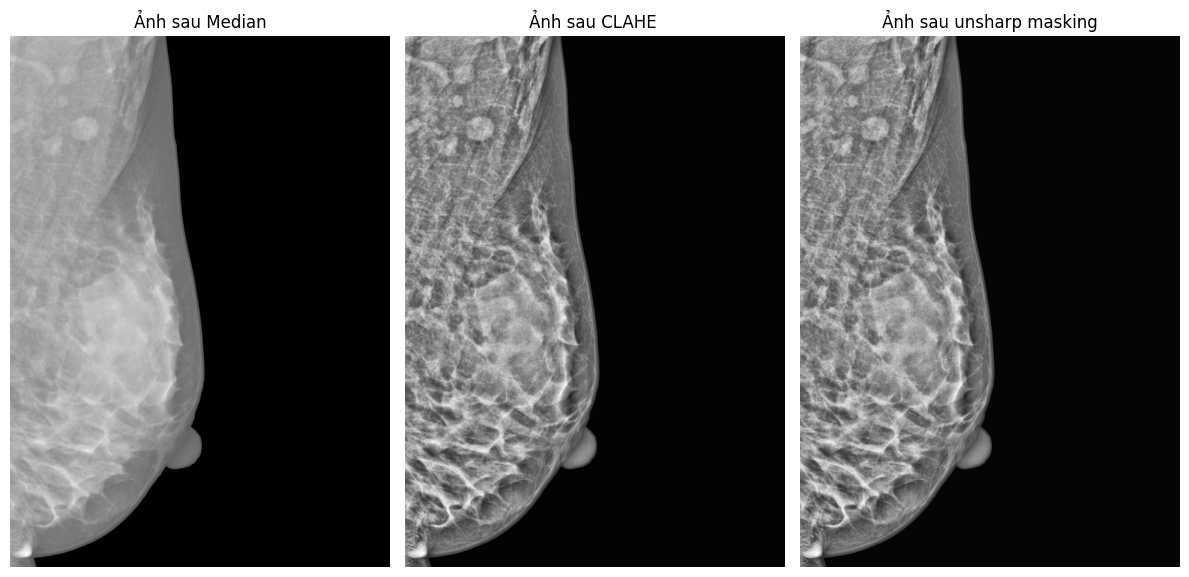

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh mammography
image_path ="/media/mountHDD2/chuyenmt/BrEaST/Mammo/convert.png"  # Thay đổi đường dẫn tới ảnh của bạn
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#   Áp dụng Median Filter
median_filtered_image = cv2.medianBlur(image, 5)

#   Áp dụng CLAHE
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(32, 32))
clahe_image = clahe.apply(median_filtered_image)

 

#   Áp dụng Unsharp Masking
# Tạo bộ lọc Gaussian
gaussian_blur = cv2.GaussianBlur(clahe_image, (5, 5), 0)

# Kết hợp ảnh để làm sắc nét
unsharp_masked_image = cv2.addWeighted(clahe_image, 1.5, gaussian_blur, -0.5, 0)

# Hiển thị các ảnh
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Ảnh sau Median')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('Ảnh sau CLAHE ')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(unsharp_masked_image, cmap='gray')
plt.title('Ảnh sau unsharp masking')
plt.axis('off')

plt.tight_layout()
plt.show()


(2812, 2012, 3)


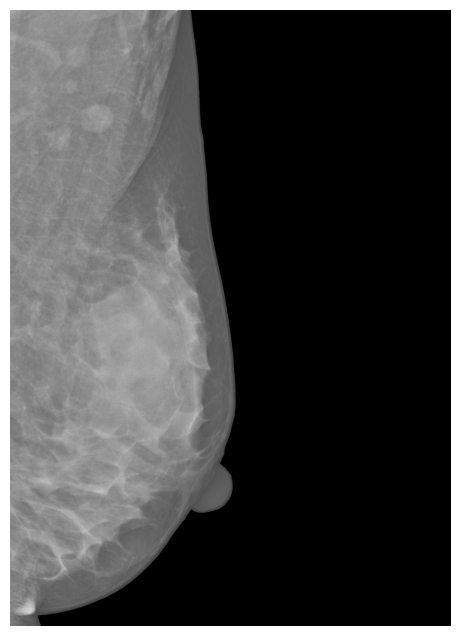

In [1]:
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# Đường dẫn đến file ảnh
# img_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG/ffff43ffbe56fd959c81d83a5ecdc4dc.png'
img_path = "/media/mountHDD2/chuyenmt/BrEaST/Mammo/convert.png" 
# Kiểm tra xem file có tồn tại không
if Path(img_path).is_file():
    # Đọc file ảnh
    image = cv2.imread(img_path)

    # Chuyển từ BGR (mặc định của OpenCV) sang RGB để hiển thị đúng
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image_rgb.shape)

    # Hiển thị ảnh
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis('off')  # Ẩn trục
    plt.show()
else:
    print(f"File không tồn tại: {img_path}")


In [71]:
h

2812

In [72]:
w

2012

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh mammography
# image_path ="/media/mountHDD2/chuyenmt/BrEaST/Mammo/convert_onl.png"  # Thay đổi đường dẫn tới ảnh của bạn
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Bước 1: Áp dụng CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
clahe_image = clahe.apply(image)

# Bước 2: Áp dụng Median Filter
median_filtered_image = cv2.medianBlur(clahe_image, 3)

# Bước 3: Áp dụng Unsharp Masking
# Tạo bộ lọc Gaussian
gaussian_blur = cv2.GaussianBlur(median_filtered_image, (5, 5), 0)

# Kết hợp ảnh để làm sắc nét
unsharp_masked_image = cv2.addWeighted(median_filtered_image, 1.5, gaussian_blur, -0.5, 0)

# Hiển thị các ảnh
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(clahe_image, cmap='gray')
plt.title('Ảnh sau CLAHE')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Ảnh sau medial ')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(unsharp_masked_image, cmap='gray')
plt.title('Ảnh sau tất cả')
plt.axis('off')

plt.tight_layout()
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/clahe.cpp:353: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function 'apply'


(3518, 2800, 3)


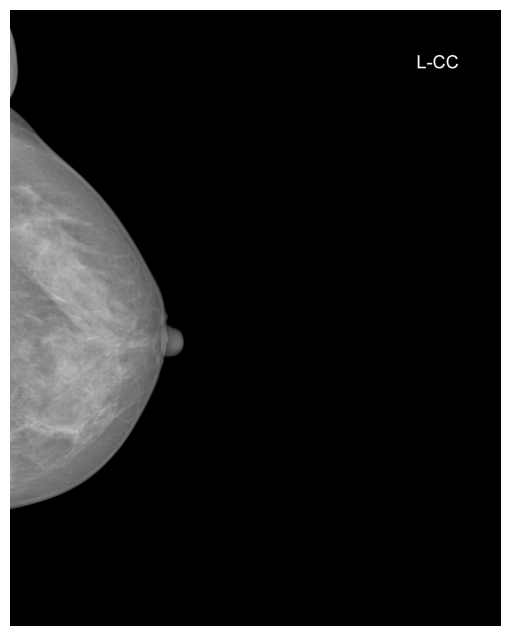

In [14]:
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# Đường dẫn đến file ảnh
# img_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG/ffff43ffbe56fd959c81d83a5ecdc4dc.png'
img_path = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG/816c0c93af016f2195ba2047d15051f8.png'

# Kiểm tra xem file có tồn tại không
if Path(img_path).is_file():
    # Đọc file ảnh
    image = cv2.imread(img_path)

    # Chuyển từ BGR (mặc định của OpenCV) sang RGB để hiển thị đúng
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image_rgb.shape)

    # Hiển thị ảnh
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis('off')  # Ẩn trục
    plt.show()
else:
    print(f"File không tồn tại: {img_path}")


In [4]:
image_rgb.shape

(3518, 2800, 3)

In [ ]:
import cv2
import numpy as np
import os
from tqdm import tqdm  # Nhập thư viện tqdm

# Đường dẫn thư mục chính
 
input_folder = '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG'
output_folder =  '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo/Processed/VinDr-Mammo-PNG_median_clahe_unsharp'

# Tạo thư mục đầu ra nếu chưa tồn tại
os.makedirs(output_folder, exist_ok=True)

# Lấy danh sách file trong thư mục đầu vào
file_list = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Duyệt qua tất cả các file trong thư mục đầu vào với thanh tiến trình
for filename in tqdm(file_list, desc="Processing images"):
    # Đường dẫn đến ảnh
    image_path = os.path.join(input_folder, filename)
    
    # Đọc ảnh
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Áp dụng Median Filter
    median_filtered_image = cv2.medianBlur(image, 5)

    # Áp dụng CLAHE
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(32, 32))
    clahe_image = clahe.apply(median_filtered_image)

    # Áp dụng Unsharp Masking
    gaussian_blur = cv2.GaussianBlur(clahe_image, (5, 5), 0)
    unsharp_masked_image = cv2.addWeighted(clahe_image, 1.5, gaussian_blur, -0.5, 0)

    # Lưu ảnh đã xử lý vào thư mục đầu ra
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, unsharp_masked_image)

print("All images processed and saved.")


Processing images:  10%|█████▉                                                     | 2002/20000 [06:31<52:45,  5.69it/s]

In [ ]:
# import os
# import numpy as np
# from PIL import Image
# from tqdm import tqdm
# # Đường dẫn đến thư mục chứa ảnh
# main = "/media/mountHDD2/chuyenmt/"
# input_folder = main + '/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG'
# output_folder = main +'Dataset/VinDr-Mammo/Processed/VinDr-Mammo-PNG_aligned'

# # Tạo thư mục đầu ra nếu chưa tồn tại
# os.makedirs(output_folder, exist_ok=True)

# # Lặp qua tất cả các ảnh trong thư mục
# for filename in  tqdm(os.listdir(input_folder)):
#     if filename.endswith('.png'):  # Thay đổi nếu cần cho định dạng ảnh khác
#         # Đọc ảnh
#         img_path = os.path.join(input_folder, filename)
#         img = Image.open(img_path).convert('L')  # Chuyển đổi sang ảnh grayscale
#         img_array = np.array(img)

#         # Xác định kích thước của ảnh
#         height, width = img_array.shape

#         # Đếm số pixel khác 0 bên trái và bên phải
#         left_pixels = np.sum(img_array[:, :width // 2] != 0)
#         right_pixels = np.sum(img_array[:, width // 2:] != 0)

#         # Nếu phần vú nằm bên trái, đảo ngược ảnh
#         if left_pixels > right_pixels:
#             img_array = np.fliplr(img_array)  # Đảo ngược ảnh

#         # Lưu ảnh đã xử lý
#         output_path = os.path.join(output_folder, filename)
#         Image.fromarray(img_array).save(output_path)

# print("Xử lý ảnh hoàn tất!")


In [12]:
import glob
img = glob.glob('/media/mountHDD3/data_storage/biomedical_data/Dataset/VinDr-Mammo-PNG/*')
len(img)

3051